In [ ]:
# Handwritten Digit Classification
from keras.datasets import mnist

In [ ]:
(xtrain,ytrain),(xtest,ytest)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
xtrain.shape

(60000, 28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

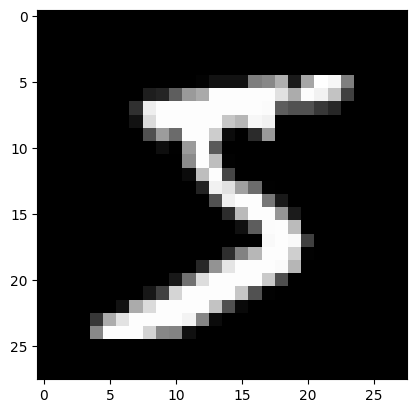

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xtrain[0],cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

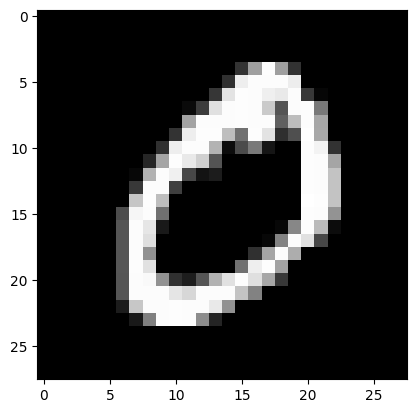

In [ ]:
plt.imshow(xtrain[1],cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

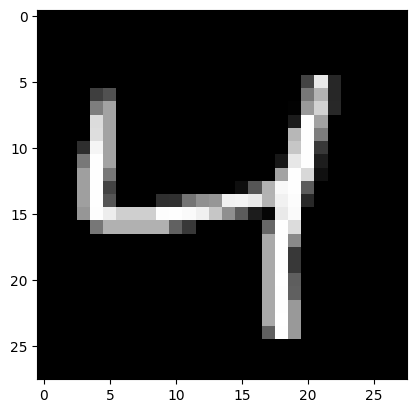

In [ ]:
plt.imshow(xtrain[2],cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

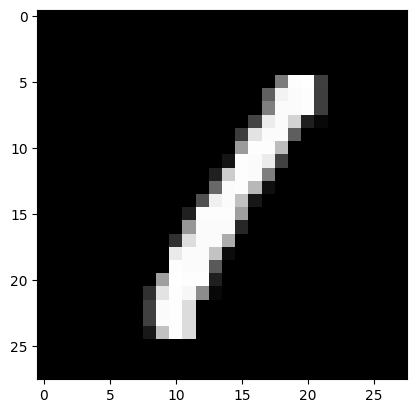

In [ ]:
plt.imshow(xtrain[3],cmap='gray')
plt.show

In [ ]:
import seaborn as sns

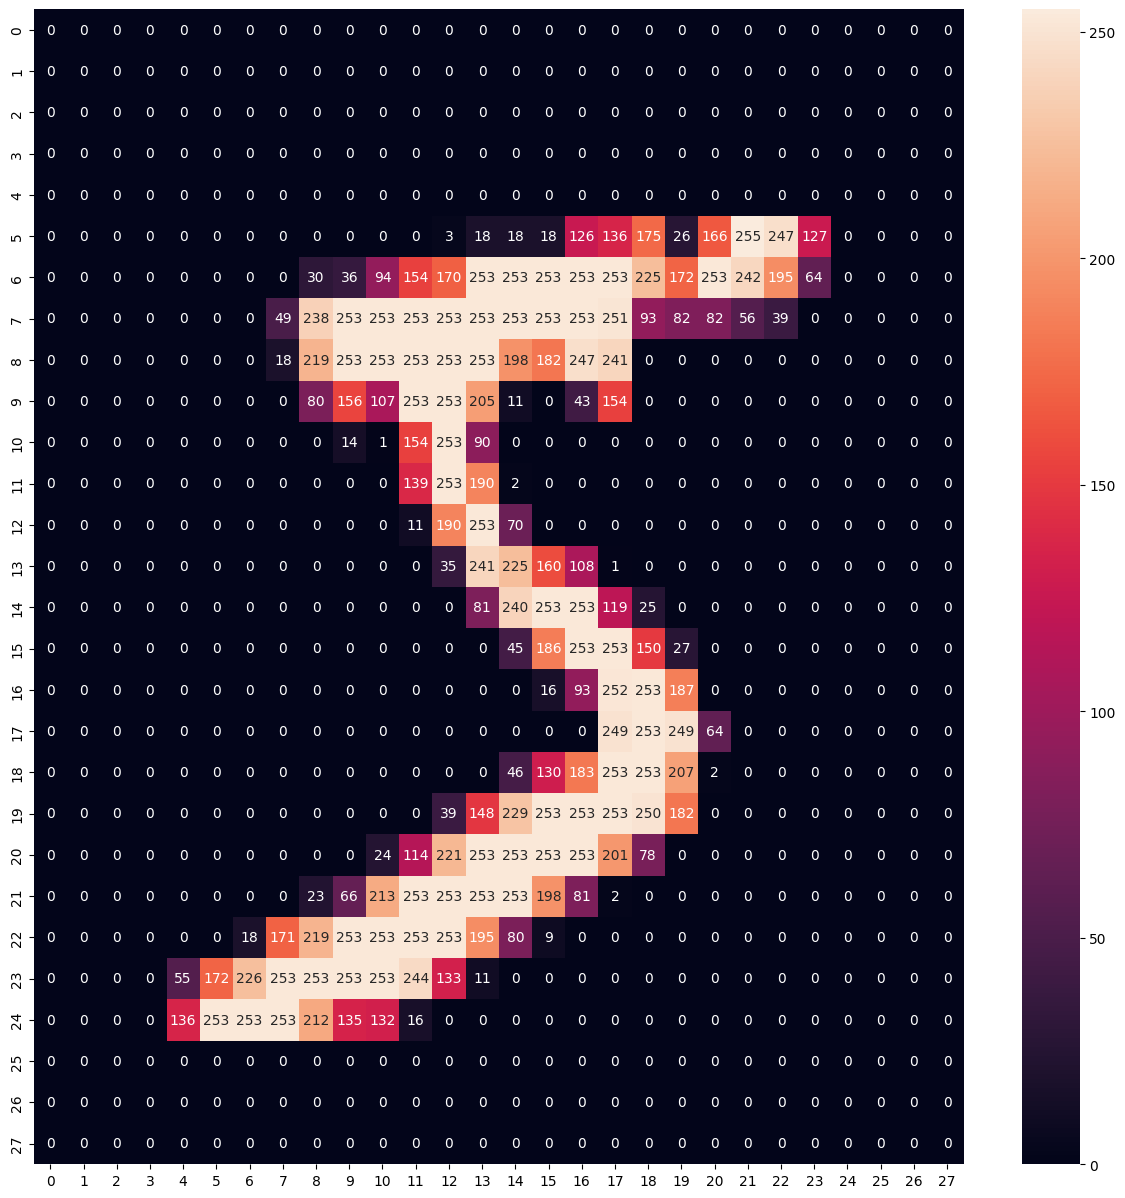

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(xtrain[0],annot=True,fmt='d')
plt.show()

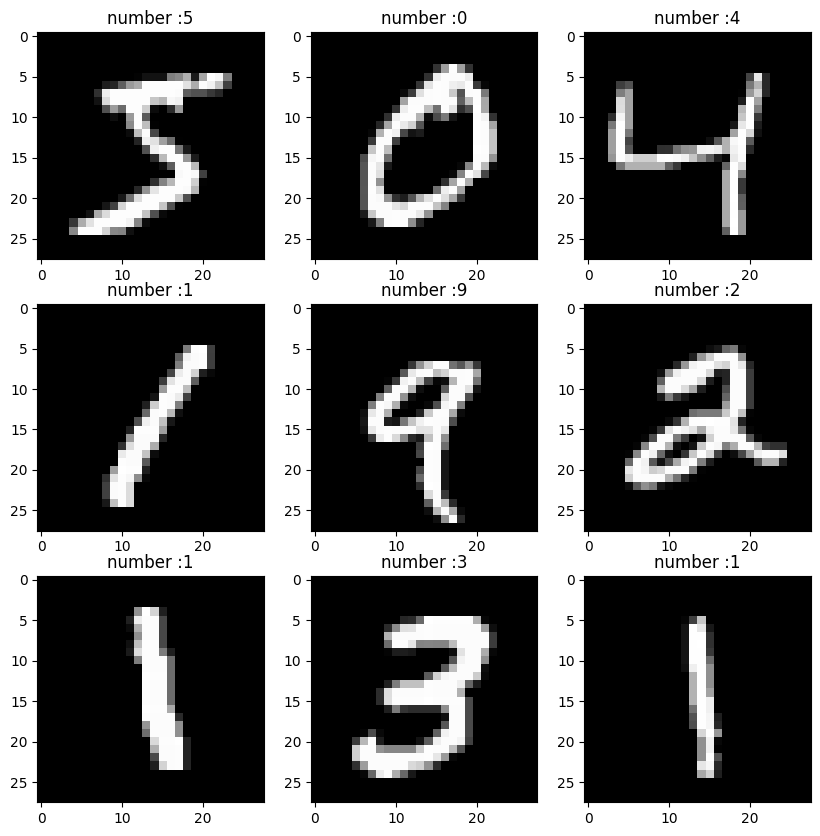

In [ ]:
# view first 9 images
plt.figure(figsize=(10,10))

for i in range (9):
  plt.subplot(3,3,i+1)
  plt.imshow(xtrain[i],cmap='gray')
  plt.title(f'number :{ytrain[i]}')

In [ ]:
# Preprocessing the data
## pixel values are between 0-255, so divided xtrain and test

In [ ]:
xtrain_scl= xtrain.astype('float32')/255
xtest_scl= xtest.astype('float32')/255

In [ ]:
import numpy as np

In [ ]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# for multiclass classification apply one hot encoding on y feature
from keras.utils import to_categorical
ytrain_cat= to_categorical(ytrain)
ytest_cat= to_categorical(ytest)

In [ ]:
ytrain_cat[0:3]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
ytrain[0:3]

array([5, 0, 4], dtype=uint8)

In [ ]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPool2D,Flatten,Dropout,Dense

In [ ]:
model=Sequential()  # initialize the model

model.add(Input(shape=(28,28,1))) ## add input layer

model.add(Convolution2D(filters=32,activation='relu',kernel_size=(3,3))) ## add convolution layer 1

# add max pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

## add convolution layer 2
model.add(Convolution2D(filters=64,activation='relu',kernel_size=(3,3)))

## add max pooling layer 2
model.add(MaxPool2D(pool_size=(2,2)))

## add a flatten layer
model.add(Flatten())

## add a dropout layer
model.add(Dropout(0.5))

## create a output layer
model.add(Dense(units=ytrain_cat.shape[1], activation='Softmax'))

In [ ]:
## compile and fit the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
hist=model.fit(xtrain,ytrain_cat,validation_split=0.2,epochs=15)

Epoch 1/15
1500/1500 [==============================] - 12s 5ms/step - loss: 0.7623 - accuracy: 0.8816 - val_loss: 0.0873 - val_accuracy: 0.9726
Epoch 2/15
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1602 - accuracy: 0.9524 - val_loss: 0.0733 - val_accuracy: 0.9794
Epoch 3/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1268 - accuracy: 0.9603 - val_loss: 0.0615 - val_accuracy: 0.9823
Epoch 4/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1097 - accuracy: 0.9661 - val_loss: 0.0679 - val_accuracy: 0.9805
Epoch 5/15
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1033 - accuracy: 0.9693 - val_loss: 0.0617 - val_accuracy: 0.9837
Epoch 6/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0910 - accuracy: 0.9730 - val_loss: 0.0483 - val_accuracy: 0.9871
Epoch 7/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0856 - accuracy: 0.9736 - val_loss: 0.0426 - val_accuracy

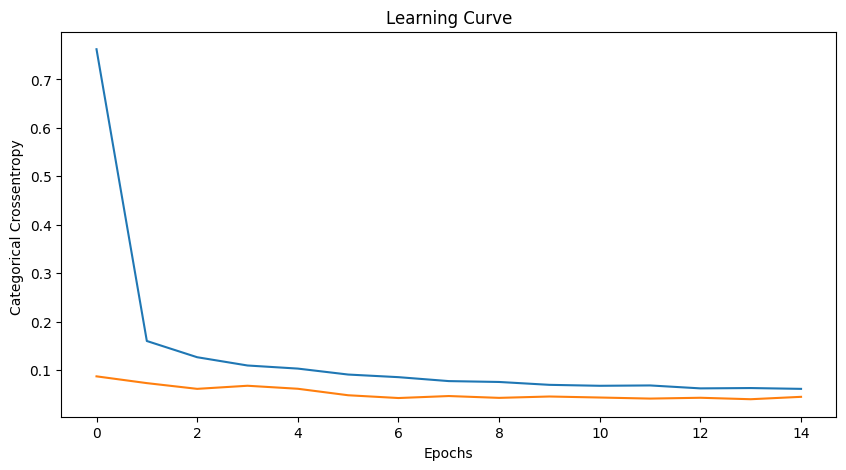

In [ ]:
# plot Learinig Curve

plt.figure(figsize=(10,5))
plt.plot(hist.history['loss'],label='Train loss')
plt.plot(hist.history['val_loss'], label='Validation_Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy ')
plt.title('Learning Curve')
plt.show()

In [ ]:
## model Evaluation

model.evaluate(xtrain,ytrain_cat)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0214 - accuracy: 0.9936


[0.02144269458949566, 0.9936166405677795]

In [ ]:
## predict probabilities for training and testing

yprob_train=model.predict(xtrain)
yprob_test=model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [ ]:
yprob_train[:5]

array([[8.8060746e-11, 6.4382605e-12, 9.6794059e-11, 4.7469395e-05,
        1.2341595e-11, 9.9994838e-01, 8.6315954e-12, 7.0475176e-10,
        3.8532530e-06, 2.9829332e-07],
       [9.9999726e-01, 5.3222244e-15, 1.5048142e-06, 2.0433191e-12,
        2.8745812e-12, 1.4170304e-11, 1.3555997e-08, 7.1039810e-13,
        1.1978332e-06, 1.4658142e-08],
       [1.1284926e-17, 2.7116639e-07, 1.0877527e-15, 1.1930641e-15,
        9.9999976e-01, 2.4496869e-14, 1.3106127e-14, 6.1654232e-10,
        1.6688336e-11, 5.8026521e-09],
       [2.3089845e-07, 9.9992597e-01, 5.5455627e-07, 6.4467182e-12,
        1.9318679e-06, 2.9444953e-11, 5.9870601e-08, 1.2669241e-07,
        7.0821421e-05, 2.6911584e-07],
       [1.1810151e-13, 8.3177890e-14, 2.9256372e-11, 7.9167896e-12,
        8.1012558e-06, 7.1111970e-12, 1.5361693e-15, 1.0070081e-08,
        6.1194014e-06, 9.9998581e-01]], dtype=float32)

In [ ]:
ypred_train=np.argmax(yprob_train,axis=1)
ypred_test=np.argmax(yprob_test,axis=1)

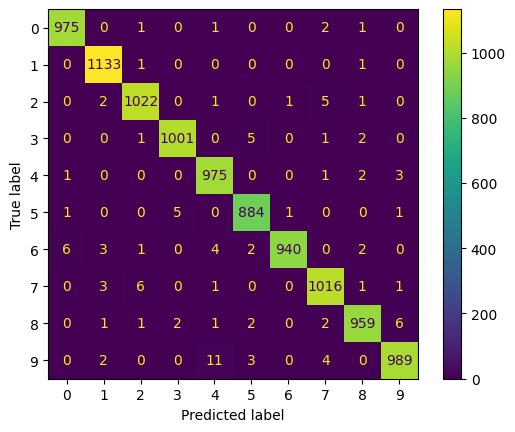

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf= confusion_matrix(ytest,ypred_test)
cfd= ConfusionMatrixDisplay(cf)
cfd.plot()